In [1]:
#q1
from git import Repo

dirname = "repo"
repo = Repo(dirname)
repo.git.checkout("master")
#repo.head.commit

''

In [2]:
len(list(repo.iter_commits()))

8

In [3]:
list(repo.iter_commits())

[<git.Commit "4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4">,
 <git.Commit "f637df3f45bc389e1035cc3aadcf5d81a55f0dc4">,
 <git.Commit "c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5">,
 <git.Commit "f37e610ce055a3d894baac2d9449e6eb77c72320">,
 <git.Commit "6f5ca9327e986315ffcacddce5d9d6195c0913b7">,
 <git.Commit "761627a3ad9ee681f27211326e9149f01764ceee">,
 <git.Commit "b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9">,
 <git.Commit "6d7beafb8e79b7a92fed8e67673a33bb7f607dbe">]

In [4]:
# For now 8 commits can be found in the file

In [5]:
#q2
import collections as co
import pandas as pd
#repo.head.commit.author.name
#repo.head.commit.authored_date
commit_list = list(repo.iter_commits())#genergate the list for process
#commit_list
author_list = [] #why must be defined first here?

for i in range(len(commit_list)):#enven if the commit_list here is a "list" here, it is still a object so I can use code "commit_list[i].author.name" right?
    #print(commit_list[i].author.name)#
    author_list.append(commit_list[i].author.name)
    
#print(author_list)
authors = co.Counter(author_list).most_common()#https://blog.csdn.net/spynao/article/details/50186531(Chinese)
print(dict(authors))

{'Steve': 3, 'Ada': 3, 'Linus': 2}


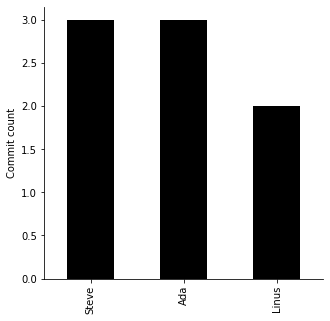

In [6]:
#q3
# Creating a dataframe object from listoftuples
df = pd.DataFrame(authors) #https://thispointer.com/python-pandas-how-to-convert-lists-to-a-dataframe/
df.columns = ['name', 'times']
df.set_index(["name"], inplace=True)
#df
import matplotlib as mp

mp.rcParams.update({'font.size': 16})

barp = df.plot.bar(color="black", figsize=(5, 5))
barp.set_xlabel("")
barp.set_ylabel("Commit count")
barp.legend_.remove()
barp.spines["top"].set_visible(False)
barp.spines["right"].set_visible(False)

In [7]:
#q4
# commit_list it generated above through repo.itercommits()
#for i in range(len(commit_list)):
#    print(commit_list[i].authored_date)
from datetime import datetime
dt = datetime.fromtimestamp(1579744630)
#print(type(dt), dt)
dt = datetime.fromtimestamp(1580340975)
#print(type(dt), dt)
for i in range(len(commit_list)):
    day =datetime.isoweekday(datetime.fromtimestamp(commit_list[i].authored_date))
    print(commit_list[i].author.name, "woked on", day)
    if (day >= 6):
        print("member works on weekend:", commit_list[i].author.name, "weekday:", day)

Steve woked on 1
Steve woked on 7
member works on weekend: Steve weekday: 7
Ada woked on 4
Steve woked on 3
Ada woked on 1
Linus woked on 1
Linus woked on 5
Ada woked on 4


In [8]:
#q5
import git
length = list()
time = list()
#headcommit = repo.head.commit

for commit in repo.iter_commits():
    #print(commit.author.name)
    repo.git.checkout(commit.hexsha)#commit_list.encoding
    #print(commit.hexsha)
    f = open('repo/wc.py', encoding='utf-8')
    length.append(len(f.readlines()))
    #print(length)
    time.append(commit.authored_date/ 60/ 60/ 24)
    #print(time)
    #print(f.readlines())
#repo.git.checkout("4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4")
repo.git.checkout("master")

length.reverse()
#print(length)
time.reverse()
time0 = time[0]
for i in range(len(time)):
    time[i] = time[i] - time0
#print(time)

df = pd.DataFrame({'days': time, 'lines': length})
#df['new_colu'] = length
df

,days,lines
0,0.000000,21
1,1.005046,35
2,3.880046,35
3,4.087963,39
4,5.921296,40
5,6.962963,40
6,9.171296,40
7,11.046296,43


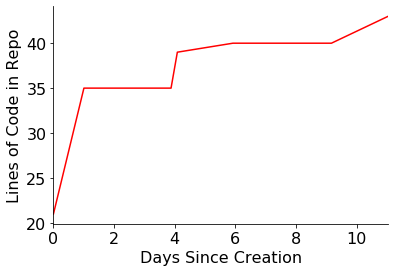

In [9]:
#q6
df.set_index(["days"], inplace=True)

mp.rcParams.update({'font.size': 16})

linep = df.plot.line(color="red")
linep.set_xlabel("Days Since Creation")
linep.set_ylabel("Lines of Code in Repo")
linep.legend_.remove()
linep.spines["top"].set_visible(False)
linep.spines["right"].set_visible(False)

In [10]:
#q7
import subprocess
from subprocess import check_output
import json

def run_wc(body, commit=None):
    if commit == None:
        commit = commit_list[0]
        
    repo.git.checkout(commit)#commit_list.encoding
    
    f = open('repo/test.txt','w',encoding = 'utf-8') 
    f.write(body)
    f.close()
    try:
        output = str(check_output('python3 repo/wc.py repo/test.txt ALL', shell=True), encoding = 'utf-8')
        output = json.loads(output)
        #output = output.replace('\n ', "")
        #output = output.replace('\n', '')
        #output = output.replace('"', "'")
        #output = output.replace('{ ', '{')
        return output
    except subprocess.CalledProcessError as error:
        return None

test1 = """X Y Z"""
# expected result: {'X': 1, 'Y': 1, 'Z': 1}
test1 = """X Y Z"""

# expected result: 
test2 = """A B
A C
"""

# expected result: {'A': 2, 'B': 1, 'C': 1}
test3 = """A B
a c
"""
run_wc(test1)

{'X': 1, 'Y': 1, 'Z': 1}

In [11]:
#q8
run_wc(test3)

{'A': 2, 'B': 1, 'C': 1}

In [12]:
def test_table(body, expected):
    repo = Repo(dirname)
    commit_list = list()
    msg20_list = list()
    author_list = list()
    pass_list = list()
    for commit in repo.iter_commits():
        commit_list.append(commit.hexsha)
        #print(commit.hexsha)
        msg20_list.append(commit.message[0:20].replace('\n', ''))
        author_list.append(commit.author.name)
        output = run_wc(body,commit)
        #print(output)
        #print(str(expected))
        #print(type(output))
        #print(type(expected))
        if (output != None and str(output) == str(expected)):#
            pass_list.append('True')
        else:
            pass_list.append('False')
            
    repo.git.checkout("master")
    #repo.git.checkout("4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4")
    #print(commit_list)
    #print(msg20_list)
    #print(author_list)
    #print(pass_list)
    commit_list.reverse()
    msg20_list.reverse()
    author_list.reverse()
    pass_list.reverse()
    df = pd.DataFrame({'commit': commit_list, 'msg20': msg20_list, 'author': author_list, 'pass': pass_list})
    df.style
    return df

In [13]:
#q9
df = test_table(test1, {'X': 1, 'Y': 1, 'Z': 1})
df

,commit,msg20,author,pass
0,6d7beafb8e79b7a92fed8e67673a33bb7f607dbe,count a specific wor,Ada,False
1,b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9,support wildcards,Linus,True
2,761627a3ad9ee681f27211326e9149f01764ceee,bugfix,Linus,True
3,6f5ca9327e986315ffcacddce5d9d6195c0913b7,"ignore case, usage l",Ada,True
4,f37e610ce055a3d894baac2d9449e6eb77c72320,do not repeatedly re,Steve,True
5,c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5,optimize: only compu,Ada,True
6,f637df3f45bc389e1035cc3aadcf5d81a55f0dc4,only make one pass o,Steve,False
7,4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4,only make one pass o,Steve,True


In [14]:
#q10
df = test_table(test2, {'A': 2, 'B': 1, 'C': 1})
df

,commit,msg20,author,pass
0,6d7beafb8e79b7a92fed8e67673a33bb7f607dbe,count a specific wor,Ada,False
1,b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9,support wildcards,Linus,False
2,761627a3ad9ee681f27211326e9149f01764ceee,bugfix,Linus,True
3,6f5ca9327e986315ffcacddce5d9d6195c0913b7,"ignore case, usage l",Ada,True
4,f37e610ce055a3d894baac2d9449e6eb77c72320,do not repeatedly re,Steve,True
5,c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5,optimize: only compu,Ada,True
6,f637df3f45bc389e1035cc3aadcf5d81a55f0dc4,only make one pass o,Steve,False
7,4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4,only make one pass o,Steve,True


In [15]:
#q11
df = test_table(test3, {'A': 2, 'B': 1, 'C': 1})
df

,commit,msg20,author,pass
0,6d7beafb8e79b7a92fed8e67673a33bb7f607dbe,count a specific wor,Ada,False
1,b0df6dbe111f9e28fc3a9c9b841cde5c20c365f9,support wildcards,Linus,False
2,761627a3ad9ee681f27211326e9149f01764ceee,bugfix,Linus,False
3,6f5ca9327e986315ffcacddce5d9d6195c0913b7,"ignore case, usage l",Ada,True
4,f37e610ce055a3d894baac2d9449e6eb77c72320,do not repeatedly re,Steve,True
5,c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5,optimize: only compu,Ada,True
6,f637df3f45bc389e1035cc3aadcf5d81a55f0dc4,only make one pass o,Steve,False
7,4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4,only make one pass o,Steve,True


In [16]:
versions = {
    "v0-baseline": "6f5ca9327e986315ffcacddce5d9d6195c0913b7",
    "v1-open-once": "f37e610ce055a3d894baac2d9449e6eb77c72320",
    "v2-pass-per-uniq": "c10b5a6cb4f06c96f6f221df2d5ec33af767d5c5",
    "v3-single-pass": "4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4",
}
type(versions)
dic = pd.DataFrame(pd.Series(versions), columns = ['Hexsha'])
#dic

import random
import time
def time_run_sec(uniq_words = 0, total_words = 0, word_size = 6, commit = None):
    
    letter_list = 'abcdefjhigklmnopqrstuvwxyz'
    uniqword_list = list()
    for i in range(uniq_words):
        uniqword_list.append(''.join(random.choices(letter_list, k = word_size)))
    totalword_list = list()
    for i in range(total_words):
        totalword_list.append(random.choice(uniqword_list))
    #print(totalword_list)
    #body = "".join(totalword_list)#https://blog.csdn.net/roytao2/article/details/53433373
    body = str("\"\"\"" + str(totalword_list) + "\"\"\"")
    t0 = time.time()
    run_wc(body, commit)
    #print(commit.hexsha)
    t1 = time.time()
    
    time_use = t1-t0
    
    #print(time_use)
    
    return time_use

#print(type(dic['Hexsha'][0]))

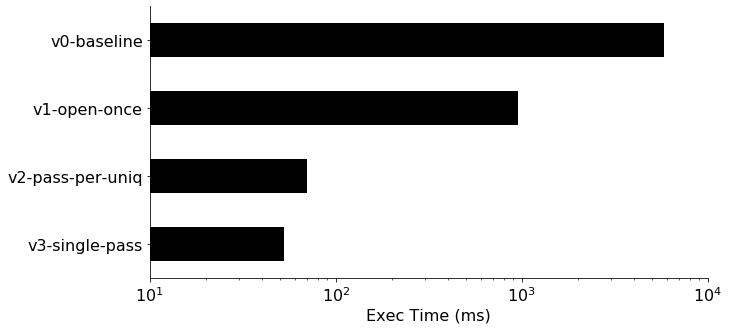

In [17]:
#q12
timeusage_list = list()

for i in range(len(dic)):
    for commit in repo.iter_commits():
        if (dic['Hexsha'][i] == commit.hexsha):
            timeusage_list.append(1000 * time_run_sec(100, 5000, 6, commit))
            repo.git.checkout("master")
            #repo.git.checkout("4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4")
timeusage_list
timedf = pd.DataFrame(pd.Series(timeusage_list), columns = ['times'])

timedf.index = dic.index

timedf

mp.rcParams.update({'font.size': 16})

barp12 = timedf.plot.barh(color="black", figsize=(10, 5))
barp12.set_xlabel("Exec Time (ms)")
mp.pyplot.xlim(10, 10000)
barp12.set_xscale("log")
barp12.invert_yaxis()
barp12.legend_.remove()
barp12.spines["top"].set_visible(False)
barp12.spines["right"].set_visible(False)

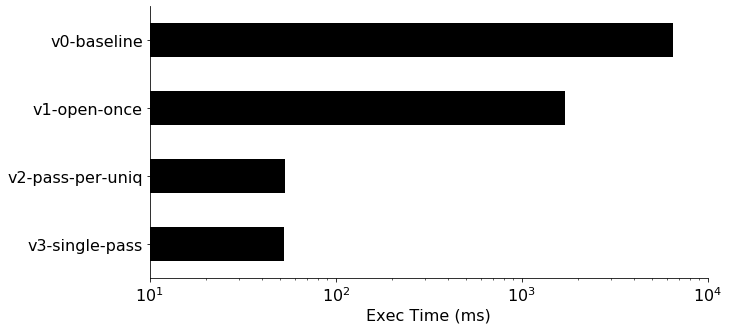

In [18]:
#q13
timeusage_list = list()

for i in range(len(dic)):
    for commit in repo.iter_commits():
        if (dic['Hexsha'][i] == commit.hexsha):
            timeusage_list.append(1000 * time_run_sec(1, 5000, 6, commit))
            repo.git.checkout("master")
            #repo.git.checkout("4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4")
timeusage_list
timedf = pd.DataFrame(pd.Series(timeusage_list), columns = ['times'])

timedf.index = dic.index

mp.rcParams.update({'font.size': 16})

barp12 = timedf.plot.barh(color="black", figsize=(10, 5))
barp12.set_xlabel("Exec Time (ms)")
mp.pyplot.xlim(10, 10000)
barp12.set_xscale("log")
barp12.invert_yaxis()
barp12.legend_.remove()
barp12.spines["top"].set_visible(False)
barp12.spines["right"].set_visible(False)

In [19]:
# It is easy to find that v3 versions used shorter time when the more unique words (1000) are used. Both versions used similar time when only one unique word is used.
# To this point, the v3 version has better time efficiency. So v3 version is better.

In [20]:
#Part 3
import numpy as np

def time_array_compute(total_word_list = [], uniq_word_list = [], commit = None):
    time_matrix = np.zeros((len(total_word_list), len(uniq_word_list)), dtype=float)
    for tw in range(len(total_word_list)):
        for uw in range(len(uniq_word_list)):
            time_matrix[tw, uw] = time_run_sec(int(uniq_word_list[uw]*total_word_list[tw] / 100), int(total_word_list[tw]), 6, commit)
    return time_matrix

In [21]:
def commit_time_arrary_compute(total_word_list = [], uniq_word_list = [], i=0):
    for commit in repo.iter_commits():
        if (dic['Hexsha'][i] == commit.hexsha):
            time_matrix= time_array_compute(total_word_list, uniq_word_list, commit)
            repo.git.checkout("master")
            #repo.git.checkout("4e4128313b8d5b5e5d04f2e8e585f64f7c5831a4")
    return time_matrix

In [22]:
total_word_list = [1000, 2000, 5000, 10000]
uniq_word_list = [10, 5, 1]
time_matrix = commit_time_arrary_compute(total_word_list, uniq_word_list, 2)
timedf1 = pd.DataFrame(time_matrix)
timedf1.index = pd.Series(total_word_list)
timedf1.columns = pd.Series(uniq_word_list)
timedf1.index.name = 'total words'
timedf1.columns.name = 'percent uniq'
timedf1

time_matrix = commit_time_arrary_compute(total_word_list, uniq_word_list, 3)
timedf2 = pd.DataFrame(time_matrix)
timedf2.index = pd.Series(total_word_list)
timedf2.columns = pd.Series(uniq_word_list)
timedf2.index.name = 'total words'
timedf2.columns.name = 'percent uniq'
timedf2

percent uniq,10,5,1
total words,,,
1000,0.051044,0.051642,0.050897
2000,0.051651,0.051644,0.051967
5000,0.053260,0.053248,0.054349
10000,0.058526,0.056498,0.055907


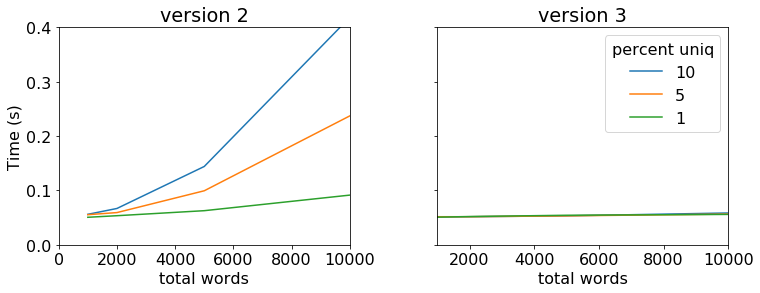

In [23]:
#q14
mp.rcParams.update({'font.size': 16})
p14v2v3 = mp.pyplot.subplots(ncols = 2,figsize = (12, 4), sharey = True)
ax_list = list(p14v2v3[1])
mp.pyplot.subplots_adjust(wspace = 0.3)
mp.pyplot.xlim(0, 10000)
mp.pyplot.ylim(0, 0.4)

timedf1.plot.line(ax = ax_list[0], title = 'version 2')
ax_list[0].set_xlabel("total words")
ax_list[0].set_xticks([0,2000,4000,6000,8000,10000])
ax_list[0].set_ylabel("Time (s)")
ax_list[0].get_legend().remove()

timedf2.plot.line(ax = ax_list[1], title = 'version 3')
ax_list[0].set_xlabel("total words")
ax_list[0].set_xticks([0,2000,4000,6000,8000,10000])
ax_list[0].set_ylabel("Time (s)")

None

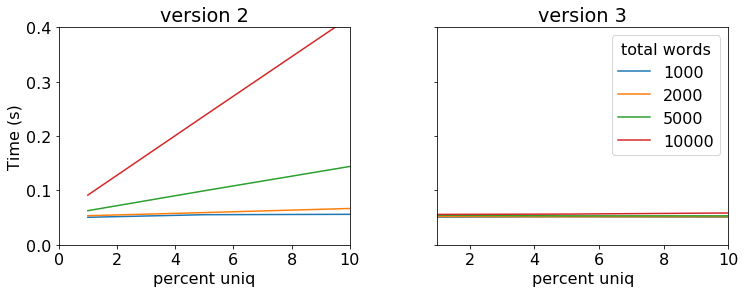

In [24]:
#q15
mp.rcParams.update({'font.size': 16})
p14v2v3 = mp.pyplot.subplots(ncols = 2,figsize = (12, 4), sharey = True)
ax_list = list(p14v2v3[1])
mp.pyplot.subplots_adjust(wspace = 0.3)
mp.pyplot.xlim(0, 10000)
mp.pyplot.ylim(0, 0.4)

timedf1.T.plot.line(ax = ax_list[0], title = 'version 2')
ax_list[0].set_xlabel("percent uniq")
ax_list[0].set_xticks([0,2,4,6,8,10])
ax_list[0].set_ylabel("Time (s)")
ax_list[0].get_legend().remove()

timedf2.T.plot.line(ax = ax_list[1], title = 'version 3')
ax_list[0].set_xlabel("percent uniq")
ax_list[0].set_xticks([0,2,4,6,8,10])
ax_list[0].set_ylabel("Time (s)")

None

In [25]:
#q16
df = pd.DataFrame()
df.index.name = "total"
df.columns.name = "trial"
for i in range(10):
    total_words = 10000 * (i+1)
    #print(total_words)
    uniq = total_words // 10
    for trial in range(5):
        df.loc[total_words/1000, trial] = 1000*time_run_sec(uniq, total_words, 6, None) # TODO: call time_run_sec
df

trial,0,1,2,3,4
total,,,,,
10.0,58.593750,58.942795,57.921886,57.551384,58.522463
20.0,64.540863,65.791607,64.373255,65.629005,64.470530
30.0,72.819948,74.001551,74.702263,73.056698,74.957848
40.0,81.679583,81.196070,82.867384,81.941843,81.876040
50.0,90.257645,88.355303,90.731859,90.663671,89.661121
60.0,97.447395,97.357273,97.241640,98.342657,97.076178
70.0,106.178045,105.799198,106.935501,106.850386,106.310368
80.0,120.035410,119.861841,117.279291,116.479874,120.037556
90.0,124.680758,121.340513,138.100386,123.395920,128.993750


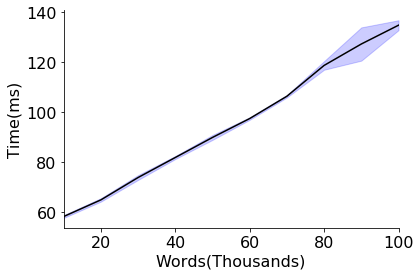

In [26]:
mean = df.mean(axis=1)
std = df.std(axis=1)

mp.rcParams.update({'font.size': 16})

linep16 = mean.plot.line(color="black")
linep16.set_xlabel("Words(Thousands)")
linep16.set_ylabel("Time(ms)")
#linep16.legend_.remove()
linep16.spines["top"].set_visible(False)
linep16.spines["right"].set_visible(False)
linep16.fill_between(mean.index, mean-std, mean+std, color='b', alpha=0.2)
None

In [27]:
#https://codesachin.wordpress.com/2016/06/09/the-magic-behind-attribute-access-in-python/
#http://kuanghy.github.io/2016/07/04/python-attr
#https://stackoverflow.com/questions/38573405/use-get-set-with-dictionary-item
class Counter():
    def __init__(self,words = None):
        if words == None:
            self.dic = dict()
        else :
            low_words = list()
            for s in words: 
                low_words.append(s.lower())
            self.dic = dict(co.Counter(low_words))

    def __getitem__(self, key):
        key = key.lower()
        if key in self.dic.keys():
            return self.dic[key]
        else:
            return 0
    
    def __setitem__(self, key, num = 0):
        key = key.lower()
        self.dic[key] = num
        #set.__dict__[key] = num
        '''key = key.lower()
        if self.__getitem__(key) == 0:
            self.__dict__[key] = num
        else:
            self.__dict__[key] = self.__getitem__(key) + num'''
    
    def __repr__(self):
        new_dict = {}#https://blog.csdn.net/qq_35959613/article/details/88597727
        for i, j in self.dic.items():
            new_dict[i.upper()] = j
        new_dict = str(new_dict)
        return new_dict
    
    def max_keys(self):#https://blog.csdn.net/qq_42147047/article/details/80625208
        maxval = max(self.dic.values())
        max_key_list = []
        for i, j in self.dic.items():
            if j == maxval:
                max_key_list.append(i.upper())#https://blog.csdn.net/xm_csdn/article/details/52913150
        #max_key_list = str(max_key_list)
        print(max_key_list)
        #return max_key_list


In [28]:
#q17
c = Counter()
c["apple"]

0

In [29]:
#q18
c = Counter()
c["apple"] += 1
c["banana"] += 1
c["BANANA"] += 1
c["kiwi"] += 2
c["banana"]

2

In [30]:
#q19
c

{'APPLE': 1, 'BANANA': 2, 'KIWI': 2}

In [31]:
#q20
c.max_keys()

['BANANA', 'KIWI']
